In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
tf.set_random_seed(777)
from sklearn.preprocessing import MinMaxScaler

In [5]:
Data = pd.read_excel('raw.xlsx') # import Data
First_cut = Data.drop("ID",1)
Cut = np.array(First_cut)

In [6]:
# ID 정리
ID = Data['ID']
ID = list(ID)
DID = []
for i in ID:
    for j in range(0,8): # 8개년도
        DID.append(i)

#균열율 정리
crack = Cut[0:96,0:8]
Dcrack = []
for i in crack:
    for j in i:
        Dcrack.append(j)
#수정 총 교통량 정리
AADT = Cut[0:96,8:16]
DAADT = []
for i in AADT:
    for j in i:
        DAADT.append(j)
#수정 ESAL 정리
ESAL = Cut[0:96,16:24]
DESAL = []
for i in ESAL:
    for j in i:
        DESAL.append(j)
#평균기온 정리
Temp = Cut[0:96,24:32]
DTemp = []
for i in Temp:
    for j in i:
        DTemp.append(j)

#평균강수량 정리
Rain = Cut[0:96,32:40]
DRain = []
for i in Rain:
    for j in i:
        DRain.append(j)
        
#평균기온 정리
Snow = Cut[0:96,40:48]
DSnow = []
for i in Snow:
    for j in i:
        DSnow.append(j)

#평균기온 정리
MaxtemEver = Cut[0:96,48:56]
DMaxtemEver = []
for i in MaxtemEver:
    for j in i:
        DMaxtemEver.append(j)

#평균기온 정리
Maxtem = Cut[0:96,56:64]
DMaxtem = []
for i in Maxtem:
    for j in i:
        DMaxtem.append(j)
        
#평균기온 정리
LowtemEver = Cut[0:96,64:72]
DLowtemEver = []
for i in LowtemEver:
    for j in i:
        DLowtemEver.append(j)
        
#평균기온 정리
Lowtem = Cut[0:96,72:80]
DLowtem = []
for i in Lowtem:
    for j in i:
        DLowtem.append(j)
        
#평균기온 정리
Wet = Cut[0:96,80:88]
DWet = []
for i in Wet:
    for j in i:
        DWet.append(j)
        
#평균기온 정리
Sunny = Cut[0:96,88:96]
DSunny = []
for i in Sunny:
    for j in i:
        DSunny.append(j)

#평균기온 정리
BZ = Cut[0:96,96:104]
DBZ = []
for i in BZ:
    for j in i:
        DBZ.append(j)   

In [7]:
ID

[101,
 102,
 104,
 106,
 107,
 109,
 110,
 111,
 113,
 114,
 116,
 120,
 121,
 122,
 123,
 125,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 148,
 149,
 150,
 151,
 155,
 156,
 157,
 161,
 203,
 204,
 205,
 207,
 208,
 211,
 212,
 214,
 215,
 216,
 218,
 219,
 220,
 221,
 223,
 225,
 226,
 227,
 228,
 230,
 231,
 232,
 233,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 247,
 248,
 250,
 301,
 303,
 304,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 321,
 322,
 325,
 326,
 327,
 328,
 332]

In [8]:
Df = pd.DataFrame(data={'ID':DID,'Crack' : Dcrack, 'AADT': DAADT, 'ESAL' : DESAL, 'Temp': DTemp, 'Rain' : DRain, 'Snow' : DSnow
                        , 'MaxtemEver' : DMaxtemEver,'Maxtem' : DMaxtem, 'LowtemEver' : DLowtemEver, 'Lowtem' : DLowtem, 'Wet' : DWet, 'Sunny' : DSunny, 'BZ' : DBZ})
Df
Df.to_csv('data1.csv')

In [9]:
Second_cut = Df.drop("ID",1)
second_ID = Df['ID']
second_ID

0      101
1      101
2      101
3      101
4      101
5      101
6      101
7      101
8      102
9      102
10     102
11     102
12     102
13     102
14     102
15     102
16     104
17     104
18     104
19     104
20     104
21     104
22     104
23     104
24     106
25     106
26     106
27     106
28     106
29     106
      ... 
738    326
739    326
740    326
741    326
742    326
743    326
744    327
745    327
746    327
747    327
748    327
749    327
750    327
751    327
752    328
753    328
754    328
755    328
756    328
757    328
758    328
759    328
760    332
761    332
762    332
763    332
764    332
765    332
766    332
767    332
Name: ID, Length: 768, dtype: int64

In [10]:
Df1 = np.array(Second_cut)
print(Df1)


[[1.15791429e+01 7.97500000e+03 1.20940000e+03 ... 6.70000000e+01
  1.85650000e+04 4.80000000e+01]
 [1.19265171e+01 7.74500000e+03 1.59160000e+03 ... 6.80000000e+01
  2.13710000e+04 3.90000000e+01]
 [5.18914286e+00 7.75300000e+03 1.53920000e+03 ... 6.70000000e+01
  2.08710000e+04 4.10000000e+01]
 ...
 [1.87000000e+00 3.90600000e+03 6.60200000e+02 ... 6.50000000e+01
  2.23960000e+04 4.90000000e+01]
 [2.02000000e+00 4.33600000e+03 5.03000000e+02 ... 6.00000000e+01
  2.45240000e+04 3.30000000e+01]
 [2.56000000e+00 6.07500000e+03 7.04733625e+02 ... 6.40000000e+01
  2.31160000e+04 4.20000000e+01]]


In [11]:
for i in range(96):
    targetstart = i * 8
    targetend = targetstart + 8
    cutting = Df1[targetstart : targetend, 0 : 13]
    cutting = pd.DataFrame(cutting)
    
    if i == 0 :
        Fulldata = cutting
    else:
        Fulldata = pd.concat([Fulldata, cutting],axis=1)
        
Fulldata = np.array(Fulldata)

In [12]:
DIID = []
for i in ID:
    for j in range(0,13): 
        DIID.append(i)
COLL = ['Crack', 'AADT', 'ESAL', 'Temp', 'Rain', 'Snow', 'MaxtemEver','Maxtem', 'LowtemEver', 'Lowtem', 'Wet', 'Sunny', 'BZ' ]
COLL= COLL * 96
DIID = np.array(DIID)
COLL = np.array(COLL)
print(np.shape(DIID))
print(np.shape(COLL))
print(np.shape(Fulldata))

(1248,)
(1248,)
(8, 1248)


In [13]:
df3 = pd.DataFrame(Fulldata , columns=[DIID, COLL])

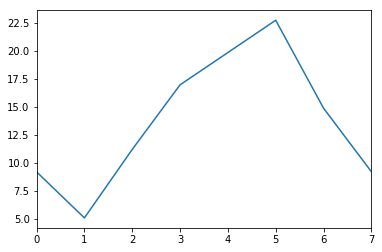

In [14]:
df3[104]['Snow'].plot()

In [15]:
df3

101                                                                   \
       Crack    AADT        ESAL   Temp     Rain       Snow MaxtemEver Maxtem   
0  11.579143  7975.0  1209.40000  115.0  12863.0   9.200000      180.0  343.0   
1  11.926517  7745.0  1591.60000  117.0  15182.0   5.100000      182.0  352.0   
2   5.189143  7753.0  1539.20000  117.0  15278.0  11.200000      179.0  341.0   
3  10.303714  7242.0  1460.60000  109.0  19395.0  16.951439      167.0  330.0   
4  11.206286  7341.0   321.90000  107.0  23112.0  19.827159      168.0  352.0   
5  10.470000  7057.0   566.00000  110.0  13839.0  22.702878      174.0  364.0   
6  11.010000  7315.0   478.70000  114.0  14709.0  14.870671      175.0  343.0   
7  11.090000  7384.0   483.21542  121.0   7416.0   9.217128      187.0  363.0   

                     ...    332                                       \
  LowtemEver Lowtem  ...   Temp     Rain      Snow MaxtemEver Maxtem   
0       66.0 -138.0  ...  147.0  12414.0  0.100000      190.0  360.0   
1       66.0 -152.0  ...  141.0   8854.0  0.100000      184.0  356.0   
2       67.0 -150.0  ...  148.0   8855.0  0.300000      191.0  353.0   
3       62.0 -195.0  ...  146.0   9274.0  4.025492      188.0  357.0   
4       59.0 -191.0  ...  143.0  10899.0  5.888238      185.0  351.0   
5       60.0 -197.0  ...  141.0  13337.0  7.750984      182.0  368.0   
6       64.0 -207.0  ...  149.0   9052.0  8.078248      194.0  376.0   
7       69.0 -156.0  ...  146.0  13380.0  8.064359      187.0  360.0   

                                          
  LowtemEver Lowtem   Wet    Sunny    BZ  
0      111.0  -49.0  66.0  20626.0  47.0  
1      105.0  -83.0  65.0  23051.0  39.0  
2      112.0  -88.0  63.0  22699.0  41.0  
3      109.0  -87.0  65.0  22621.0  39.0  
4      108.0 -127.0  63.0  21936.0  48.0  
5      106.0 -115.0  65.0  22396.0  49.0  
6      110.0 -123.0  60.0  24524.0  33.0  
7      109.0  -83.0  64.0  23116.0  42.0  

[8 rows x 1248 columns]

In [16]:
train = df3.T
train

0             1             2             3  \
101 Crack          11.579143     11.926517      5.189143     10.303714   
    AADT         7975.000000   7745.000000   7753.000000   7242.000000   
    ESAL         1209.400000   1591.600000   1539.200000   1460.600000   
    Temp          115.000000    117.000000    117.000000    109.000000   
    Rain        12863.000000  15182.000000  15278.000000  19395.000000   
    Snow            9.200000      5.100000     11.200000     16.951439   
    MaxtemEver    180.000000    182.000000    179.000000    167.000000   
    Maxtem        343.000000    352.000000    341.000000    330.000000   
    LowtemEver     66.000000     66.000000     67.000000     62.000000   
    Lowtem       -138.000000   -152.000000   -150.000000   -195.000000   
    Wet            67.000000     68.000000     67.000000     67.000000   
    Sunny       18565.000000  21371.000000  20871.000000  18459.000000   
    BZ             48.000000     39.000000     41.000000     56.000000   
102 Crack          18.861429     17.541129     13.260857      7.781143   
    AADT         7975.000000   7745.000000   7753.000000   7242.000000   
    ESAL         1209.400000   1591.600000   1539.200000   1460.600000   
    Temp          115.000000    117.000000    117.000000    109.000000   
    Rain        12863.000000  15182.000000  15278.000000  19395.000000   
    Snow            9.200000      5.100000     11.200000     16.951439   
    MaxtemEver    180.000000    182.000000    179.000000    167.000000   
    Maxtem        343.000000    352.000000    341.000000    330.000000   
    LowtemEver     66.000000     66.000000     67.000000     62.000000   
    Lowtem       -138.000000   -152.000000   -150.000000   -195.000000   
    Wet            67.000000     68.000000     67.000000     67.000000   
    Sunny       18565.000000  21371.000000  20871.000000  18459.000000   
    BZ             48.000000     39.000000     41.000000     56.000000   
104 Crack           7.742571      7.251429      7.302857      8.195143   
    AADT        32494.000000  33346.000000  32796.000000  35289.000000   
    ESAL         1967.400000   2726.800000   2018.100000   2330.500000   
    Temp          115.000000    117.000000    117.000000    109.000000   
...                      ...           ...           ...           ...   
327 Lowtem       -105.000000   -146.000000   -144.000000   -137.000000   
    Wet            73.000000     70.000000     71.000000     69.000000   
    Sunny       18507.000000  20219.000000  21133.000000  19097.000000   
    BZ             44.000000     32.000000     37.000000     39.000000   
328 Crack           0.267429      0.293143      0.709714      3.875143   
    AADT         6690.000000   6818.000000   7109.000000   6950.000000   
    ESAL          904.350000   1125.100000    796.400000    836.900000   
    Temp          129.000000    128.000000    128.000000    127.000000   
    Rain        16513.000000   9021.000000  10896.000000  13783.000000   
    Snow            4.800000      8.700000      9.700000     12.020213   
    MaxtemEver    193.000000    193.000000    191.000000    185.000000   
    Maxtem        350.000000    352.000000    339.000000    349.000000   
    LowtemEver     78.000000     75.000000     73.000000     77.000000   
    Lowtem       -105.000000   -146.000000   -144.000000   -137.000000   
    Wet            73.000000     70.000000     71.000000     69.000000   
    Sunny       18507.000000  20219.000000  21133.000000  19097.000000   
    BZ             44.000000     32.000000     37.000000     39.000000   
332 Crack           0.390857      0.020571      0.100286      3.312000   
    AADT         2890.000000   3126.000000   3591.000000   3696.000000   
    ESAL          685.250000    837.000000    742.600000    785.300000   
    Temp          147.000000    141.000000    148.000000    146.000000   
    Rain        12414.000000   8854.000000   8855.000000   9274.000000   
    Snow            0.100000   

In [31]:
row = train.iloc[8,:].values # take only values, form 2D array
X = train.iloc[0:11].values
y = train.iloc[1:12].values

In [32]:
row

array([66., 66., 67., 62., 59., 60., 64., 69.])

In [33]:
y

array([[ 7.97500000e+03,  7.74500000e+03,  7.75300000e+03,
         7.24200000e+03,  7.34100000e+03,  7.05700000e+03,
         7.31500000e+03,  7.38400000e+03],
       [ 1.20940000e+03,  1.59160000e+03,  1.53920000e+03,
         1.46060000e+03,  3.21900000e+02,  5.66000000e+02,
         4.78700000e+02,  4.83215420e+02],
       [ 1.15000000e+02,  1.17000000e+02,  1.17000000e+02,
         1.09000000e+02,  1.07000000e+02,  1.10000000e+02,
         1.14000000e+02,  1.21000000e+02],
       [ 1.28630000e+04,  1.51820000e+04,  1.52780000e+04,
         1.93950000e+04,  2.31120000e+04,  1.38390000e+04,
         1.47090000e+04,  7.41600000e+03],
       [ 9.20000000e+00,  5.10000000e+00,  1.12000000e+01,
         1.69514391e+01,  1.98271586e+01,  2.27028782e+01,
         1.48706708e+01,  9.21712803e+00],
       [ 1.80000000e+02,  1.82000000e+02,  1.79000000e+02,
         1.67000000e+02,  1.68000000e+02,  1.74000000e+02,
         1.75000000e+02,  1.87000000e+02],
       [ 3.43000000e+02,  3.520000

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [21]:
X_train = np.reshape(X_train, (64,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units =256, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.


In [22]:
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = np.reshape(inputs, (24, 1, 1))
y_pred = regressor.predict(inputs)

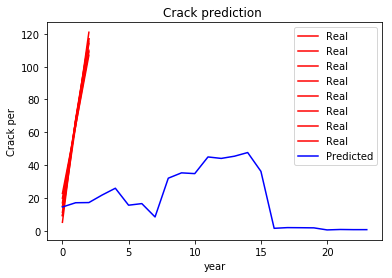

In [23]:
plt.figure
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.title('Crack prediction ')
plt.xlabel('year')
plt.ylabel("Crack per")
plt.legend()
plt.show()

In [24]:
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:7]
y_test = test_row[1:8]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (7, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

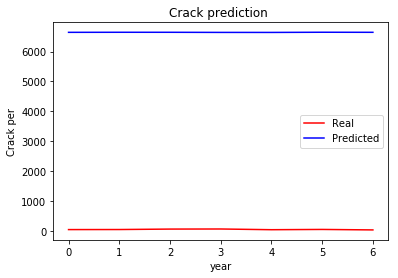

In [25]:
plt.figure
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.title('Crack prediction ')
plt.xlabel('year')
plt.ylabel("Crack per")
plt.legend()
plt.show()

In [26]:
y_test_mean = []
y_pred_mean = []
for X_value in range(0,90):
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:7]
    y_test = test_row[1:8]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (7, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))

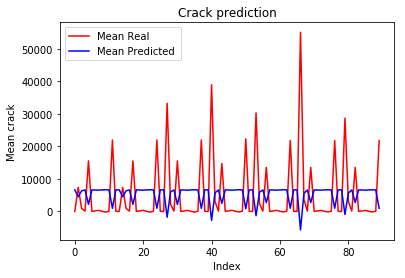

In [27]:
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real ')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted ')
plt.title('Crack prediction')
plt.xlabel('Index')
plt.ylabel('Mean crack')
plt.legend()
plt.show()

In [28]:
print(y_test_mean)
print(y_pred_mean)

[10.17080857142857, 7405.285714285715, 920.1736314813005, 113.57142857142857, 15561.57142857143, 14.267039236734933, 176.0, 349.2857142857143, 63.857142857142854, -178.28571428571428, 65.85714285714286, 22009.0, 43.142857142857146, 13.090977551020407, 7405.285714285715, 920.1736314813005, 113.57142857142857, 15561.57142857143, 14.267039236734933, 176.0, 349.2857142857143, 63.857142857142854, -178.28571428571428, 65.85714285714286, 22009.0, 43.142857142857146, 5.649346938775509, 33295.42857142857, 2185.5532277815146, 113.57142857142857, 15561.57142857143, 14.267039236734933, 176.0, 349.2857142857143, 63.857142857142854, -178.28571428571428, 65.85714285714286, 22009.0, 43.142857142857146, 5.291020408163265, 38981.0, 3041.9395254548954, 124.14285714285714, 14783.0, 13.225004271805025, 176.0, 353.14285714285717, 79.28571428571429, -153.71428571428572, 70.42857142857143, 22343.85714285714, 39.285714285714285, 7.912408163265307, 30310.714285714286, 2424.9331816964127, 118.85714285714286, 135

In [29]:
y_test_mean = []
y_pred_mean = []
for X_value in range(0,90):
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:7]
    y_test = test_row[1:8]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (7, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))

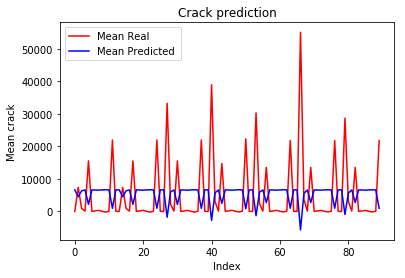

In [30]:
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real ')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted ')
plt.title('Crack prediction')
plt.xlabel('Index')
plt.ylabel('Mean crack')
plt.legend()
plt.show()